In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Bi-LSTM

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, GlobalAveragePooling1D, Dropout, MultiHeadAttention, Embedding
from keras.models import Model
from keras.callbacks import EarlyStopping

In [3]:
df_train = pd.read_csv(r'/content/drive/MyDrive/NCKH_Trinh_Kien_Hoang/Dataset/KLTN/train.csv')
df_test = pd.read_csv(r'/content/drive/MyDrive/NCKH_Trinh_Kien_Hoang/Dataset/KLTN/test.csv')

In [4]:
VOCAB_SIZE = df_train['opcode'].nunique()
MAX_SEQ_LENGTH = 200
EMBEDDING_SIZE = 256

In [5]:
from keras.utils import to_categorical

tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token='<OOV>')
tokenizer.fit_on_texts(df_train['opcode'].values)
sequences = tokenizer.texts_to_sequences(df_train['opcode'].values)
X_train = pad_sequences(sequences, maxlen=MAX_SEQ_LENGTH, padding='post')
y_train = df_train['label'].values
y_train = to_categorical(y_train)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense
import tensorflow as tf

# Define the model
# Define the model
model = Sequential()
model.add(Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_SIZE, input_length=MAX_SEQ_LENGTH))
model.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(units=128)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=3, activation='softmax'))
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 256)          361216    
                                                                 
 bidirectional (Bidirectiona  (None, 200, 256)         394240    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 200, 256)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dense_1 (Dense)             (None, 3)                 1

In [8]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
45/45 [==============================] - 16s 83ms/step - loss: 0.7889 - accuracy: 0.7670 - precision: 0.7591 - recall: 0.4410
Epoch 2/10
45/45 [==============================] - 2s 38ms/step - loss: 0.6149 - accuracy: 0.8339 - precision: 0.7727 - recall: 0.7110
Epoch 3/10
45/45 [==============================] - 2s 38ms/step - loss: 0.5910 - accuracy: 0.8431 - precision: 0.7928 - recall: 0.7166
Epoch 4/10
45/45 [==============================] - 1s 33ms/step - loss: 0.5493 - accuracy: 0.8554 - precision: 0.8050 - recall: 0.7470
Epoch 5/10
45/45 [==============================] - 1s 29ms/step - loss: 0.5263 - accuracy: 0.8641 - precision: 0.8203 - recall: 0.7583
Epoch 6/10
45/45 [==============================] - 1s 33ms/step - loss: 0.5117 - accuracy: 0.8648 - precision: 0.8252 - recall: 0.7541
Epoch 7/10
45/45 [==============================] - 1s 33ms/step - loss: 0.4969 - accuracy: 0.8690 - precision: 0.8301 - recall: 0.7633
Epoch 8/10
45/45 [=============================

In [9]:
model.save('BiLSTM_model/Multiclass_data2')

In [10]:
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token='<OOV>')
tokenizer.fit_on_texts(df_test['opcode'].values)
sequences = tokenizer.texts_to_sequences(df_test['opcode'].values)
X_test = pad_sequences(sequences, maxlen=MAX_SEQ_LENGTH, padding='post')
y_test = df_test['label'].values
y_test = to_categorical(y_test)

In [11]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 2s 23ms/step - loss: 0.9241 - accuracy: 0.7674 - precision: 0.6656 - recall: 0.6073


[0.9240527749061584,
 0.7674199342727661,
 0.6656346917152405,
 0.6073446273803711]

In [12]:
# Generate predictions on the test set
y_pred = model.predict(X_test)

12/12 [==============================] - 1s 15ms/step


In [13]:
import numpy as np
# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_classes, y_pred_classes, digits=4))

              precision    recall  f1-score   support

           0     0.7500    0.3556    0.4824       135
           1     0.4635    0.8641    0.6034       103
           2     0.9388    0.7931    0.8598       116

    accuracy                         0.6469       354
   macro avg     0.7174    0.6709    0.6485       354
weighted avg     0.7285    0.6469    0.6413       354



In [14]:
from sklearn.metrics import accuracy_score
print("Accuracy MultiClass: ", accuracy_score(y_test_classes, y_pred_classes))

Accuracy MultiClass:  0.6468926553672316


In [15]:
model.save('saved_model/bert_mutil_data')
acc = []
pre = []
rec = []
f1 = []
for i in range(11, 31):
  print(i)
  model = tf.keras.models.load_model('saved_model/bert_mutil_data')
  model.fit(X_train, y_train, epochs=1, batch_size=32)
  y_predicted = model.predict(X_test)
  y_predicted_1 = np.argmax(y_predicted, axis=1)
  y_test_1 = np.argmax(y_test, axis=1)
  metric = [i for i in classification_report(y_test_1, y_predicted_1, digits=4).split('\n')[-2].split(' ')[2:-1] if i != '']
  acc.append(round(accuracy_score(y_test_1, y_predicted_1), 4))
  pre.append(metric[0])
  rec.append(metric[1])
  f1.append(metric[2])
  model.save('saved_model/bert_mutil_data')

11
12/12 [==============================] - 1s 12ms/step


12
12/12 [==============================] - 1s 11ms/step


13
12/12 [==============================] - 3s 22ms/step


14
12/12 [==============================] - 1s 12ms/step


15
12/12 [==============================] - 1s 21ms/step


16
12/12 [==============================] - 3s 20ms/step


17
12/12 [==============================] - 1s 12ms/step


18
12/12 [==============================] - 1s 12ms/step


19
12/12 [==============================] - 1s 12ms/step


20
12/12 [==============================] - 1s 12ms/step


21
12/12 [==============================] - 1s 12ms/step


22
12/12 [==============================] - 1s 12ms/step


23
12/12 [==============================] - 1s 12ms/step


24
12/12 [==============================] - 1s 12ms/step


25
12/12 [==============================] - 1s 12ms/step


26
12/12 [==============================] - 1s 12ms/step


27
12/12 [==============================] - 1s 12ms/step


28
12/12 [==============================] - 1s 12ms/step


29
12/12 [==============================] - 3s 22ms/step


30
12/12 [==============================] - 1s 12ms/step


In [16]:
for i in acc:
  print(i)

0.7232
0.7062
0.7147
0.6497
0.7062
0.6949
0.7373
0.7034
0.7119
0.7627
0.6751
0.6977
0.7006
0.7345
0.6751
0.6864
0.7119
0.6808
0.6893
0.7062


In [17]:
for i in pre:
  print(i)

0.7348
0.7078
0.7557
0.7153
0.7028
0.7161
0.7437
0.7136
0.7362
0.7750
0.6851
0.7092
0.7199
0.7391
0.6890
0.7101
0.7198
0.7074
0.7080
0.7258


In [18]:
for i in rec:
  print(i)

0.7232
0.7062
0.7147
0.6497
0.7062
0.6949
0.7373
0.7034
0.7119
0.7627
0.6751
0.6977
0.7006
0.7345
0.6751
0.6864
0.7119
0.6808
0.6893
0.7062


In [19]:
for i in f1:
  print(i)

0.7263
0.7047
0.7143
0.6361
0.7029
0.6968
0.7384
0.7044
0.7171
0.7663
0.6688
0.6990
0.7001
0.7354
0.6718
0.6868
0.7114
0.6790
0.6899
0.7070


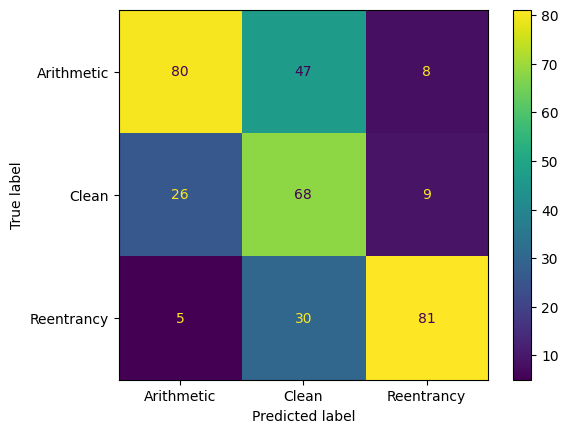

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_classes, y_pred_classes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Arithmetic", "Clean", "Reentrancy"])

cm_display.plot()
plt.show()

In [ ]:
model1 = tf.keras.models.load_model('BiLSTM_model/Multiclass_data2')

In [ ]:
model1.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
45/45 [==============================] - 10s 62ms/step - loss: 0.4712 - accuracy: 0.8686 - precision: 0.8259 - recall: 0.7675
Epoch 2/10
45/45 [==============================] - 2s 37ms/step - loss: 0.3936 - accuracy: 0.8926 - precision: 0.8597 - recall: 0.8099
Epoch 3/10
45/45 [==============================] - 2s 33ms/step - loss: 0.3883 - accuracy: 0.8928 - precision: 0.8604 - recall: 0.8099
Epoch 4/10
45/45 [==============================] - 2s 36ms/step - loss: 0.3627 - accuracy: 0.9041 - precision: 0.8733 - recall: 0.8332
Epoch 5/10
45/45 [==============================] - 2s 38ms/step - loss: 0.3645 - accuracy: 0.8973 - precision: 0.8602 - recall: 0.8261
Epoch 6/10
45/45 [==============================] - 1s 32ms/step - loss: 0.3346 - accuracy: 0.9091 - precision: 0.8797 - recall: 0.8424
Epoch 7/10
45/45 [==============================] - 2s 34ms/step - loss: 0.3077 - accuracy: 0.9131 - precision: 0.8812 - recall: 0.8544
Epoch 8/10
45/45 [=============================

In [ ]:
model1.evaluate(X_test, y_test)

12/12 [==============================] - 2s 14ms/step - loss: 1.0266 - accuracy: 0.7655 - precision: 0.6558 - recall: 0.6243


[1.026602864265442, 0.7655367255210876, 0.6557863354682922, 0.6242938041687012]

In [ ]:
# Generate predictions on the test set
y_pred = model1.predict(X_test)

12/12 [==============================] - 1s 12ms/step


In [ ]:
import numpy as np
# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_classes, y_pred_classes, digits=4))

              precision    recall  f1-score   support

           0     0.7125    0.4222    0.5302       135
           1     0.4935    0.7379    0.5914       103
           2     0.8000    0.8276    0.8136       116

    accuracy                         0.6469       354
   macro avg     0.6687    0.6626    0.6451       354
weighted avg     0.6775    0.6469    0.6409       354



In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test_classes, y_pred_classes))

0.6468926553672316


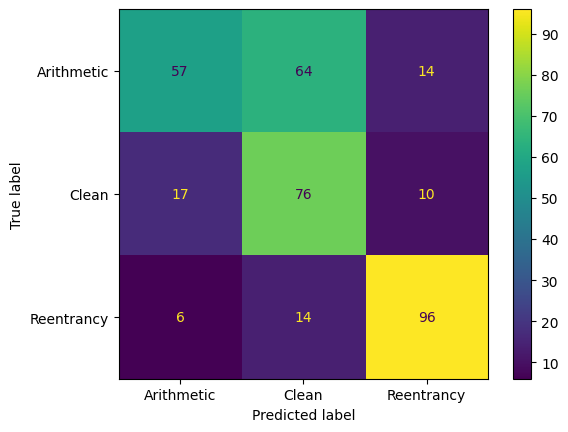

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_classes, y_pred_classes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Arithmetic", "Clean", "Reentrancy"])

cm_display.plot()
plt.show()

In [ ]:
model1.save('BiLSTM_model/Multiclass_data2')

In [ ]:
import tensorflow as tf

In [ ]:
model2 = tf.keras.models.load_model('BiLSTM_model/Multiclass_data2')

In [ ]:
model2.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
45/45 [==============================] - 10s 71ms/step - loss: 0.2436 - accuracy: 0.9383 - precision: 0.9115 - recall: 0.9025
Epoch 2/10
45/45 [==============================] - 2s 37ms/step - loss: 0.2231 - accuracy: 0.9425 - precision: 0.9179 - recall: 0.9088
Epoch 3/10
45/45 [==============================] - 1s 29ms/step - loss: 0.1874 - accuracy: 0.9562 - precision: 0.9374 - recall: 0.9307
Epoch 4/10
45/45 [==============================] - 1s 32ms/step - loss: 0.2410 - accuracy: 0.9428 - precision: 0.9204 - recall: 0.9067
Epoch 5/10
45/45 [==============================] - 1s 32ms/step - loss: 0.1866 - accuracy: 0.9501 - precision: 0.9306 - recall: 0.9187
Epoch 6/10
45/45 [==============================] - 1s 29ms/step - loss: 0.1531 - accuracy: 0.9661 - precision: 0.9523 - recall: 0.9456
Epoch 7/10
45/45 [==============================] - 1s 33ms/step - loss: 0.1519 - accuracy: 0.9684 - precision: 0.9546 - recall: 0.9505
Epoch 8/10
45/45 [=============================

In [ ]:
model2.evaluate(X_test, y_test)

12/12 [==============================] - 2s 14ms/step - loss: 1.1913 - accuracy: 0.8145 - precision: 0.7236 - recall: 0.7175


[1.1913310289382935,
 0.8145009279251099,
 0.7236467003822327,
 0.7175140976905823]

In [ ]:
# Generate predictions on the test set
y_pred = model2.predict(X_test)

12/12 [==============================] - 1s 12ms/step


In [ ]:
import numpy as np
# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_classes, y_pred_classes, digits=4))

              precision    recall  f1-score   support

           0     0.7258    0.6667    0.6950       135
           1     0.5789    0.6408    0.6083       103
           2     0.8621    0.8621    0.8621       116

    accuracy                         0.7232       354
   macro avg     0.7223    0.7232    0.7218       354
weighted avg     0.7277    0.7232    0.7245       354



In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test_classes, y_pred_classes))

0.7231638418079096


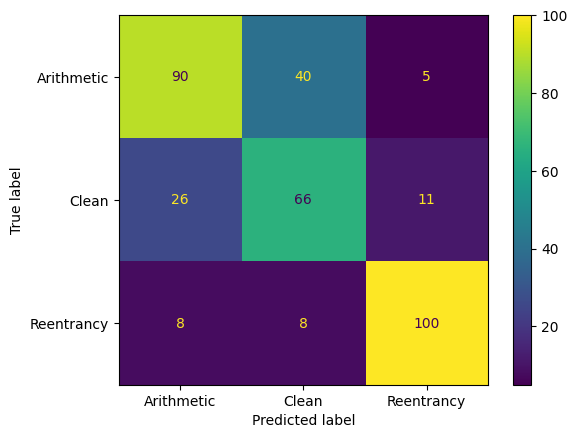

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_classes, y_pred_classes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Arithmetic", "Clean", "Reentrancy"])

cm_display.plot()
plt.savefig("/content/drive/MyDrive/NCKH_Trinh_Kien_Hoang/Figure/KLTN/BiLSTM_30.png", dpi=1200, transparent=True)
plt.show()